In [31]:
#Import packages
import csv
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Generate a list of colors based on the "bright" color scheme
colors = sns.color_palette('bright', n_colors=12)

In [35]:
df = pandas.read_csv('/Users/patrickmoll/Desktop/cis590data/DateTimeCleanedData/DateTimeCleanedReservationsAll.csv')
df['Reservation Count'] = 1
df['StatusFac'] = pd.factorize(df['Status'])[0]
df.head()

,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,Headcount,BeginTimeDate,EndTimeDate,Duration Minutes,Weekday,Month,Year,BeginTime,Reservation Count,StatusFac
0,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,100.000000,2013-01-06 09:00:00,2013-01-06 12:30:00,210.0,6,1,2013,9.0,1,0
1,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,100.000000,2013-01-06 17:00:00,2013-01-06 23:00:00,360.0,6,1,2013,17.0,1,0
2,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-07 17:30:00,2013-01-07 18:25:00,55.0,0,1,2013,17.5,1,0
3,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-09 17:30:00,2013-01-09 18:25:00,55.0,2,1,2013,17.5,1,0
4,BDMUL,CARN,HRTG,Heritage Room l,Firm,Activity,36.387374,2013-01-09 19:00:00,2013-01-09 20:15:00,75.0,2,1,2013,19.0,1,0


In [33]:
#sns.catplot(data=df, x="Year", y="Headcount", hue="Status", kind="swarm")
print(df['Status'].corr(df['Year']))
print(stats.ttest_ind(a=df['Status'], b=df['Year'], equal_var=False))


0.5082374172213879
Ttest_indResult(statistic=-262486.2428205085, pvalue=0.0)


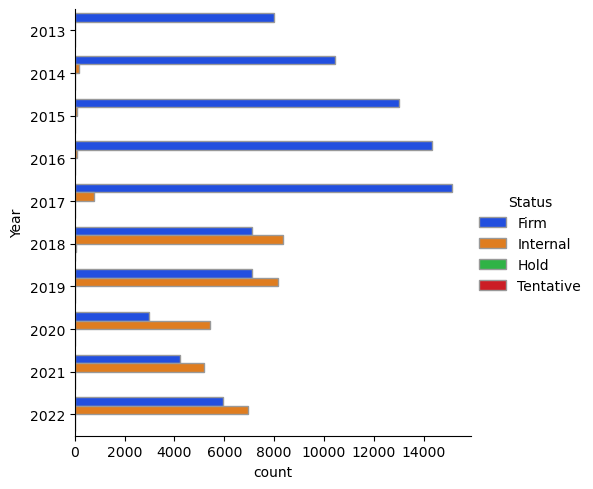

In [37]:
sns.catplot(
    data=df, y="Year", hue="Status", kind="count",
    palette="bright", edgecolor=".6", errorbar="se"
)

plt.savefig('figures/status_by_year.pdf')

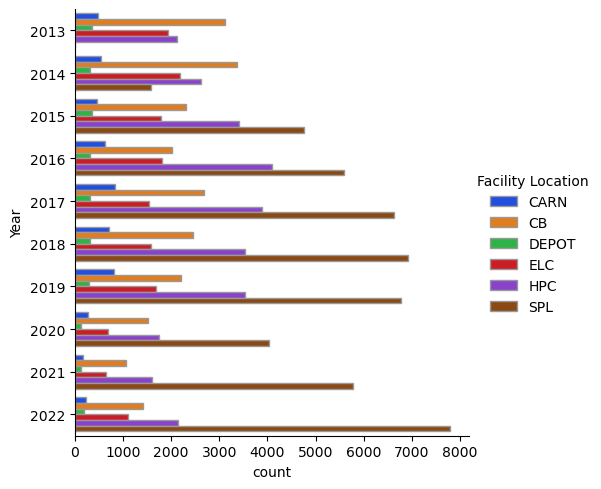

In [38]:
sns.catplot(
    data=df, y="Year", hue="Facility Location", kind="count",
    palette="bright", edgecolor=".6", errorbar="se"
)

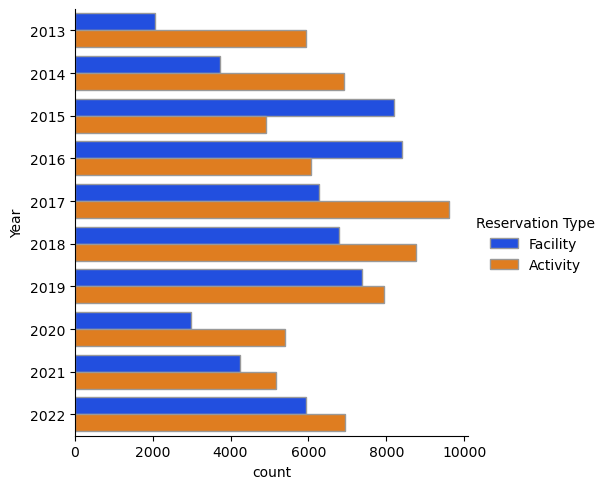

In [39]:
sns.catplot(
    data=df, y="Year", hue="Reservation Type", kind="count",
    palette="bright", edgecolor=".6", errorbar="se"
)

<AxesSubplot:xlabel='Year', ylabel='Headcount'>

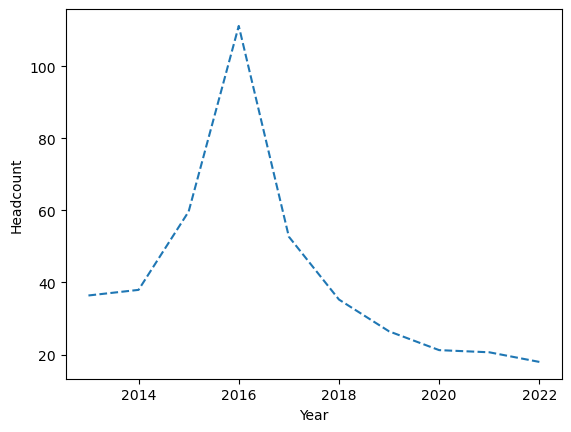

In [70]:
sns.lineplot(data=df.groupby('Year')['Headcount'].mean(), linestyle="--")

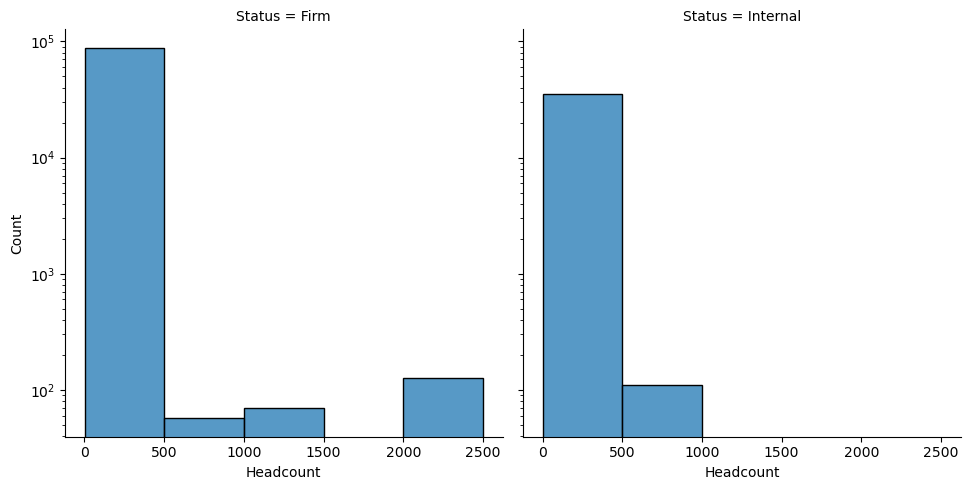

In [63]:
indexAge = df[ (df['Status'] == 'Hold') | (df['Status'] == 'Tentative') ].index
df.drop(indexAge , inplace=True)
sns.displot(df, x="Headcount", col="Status", bins=5)
plt.yscale('log')

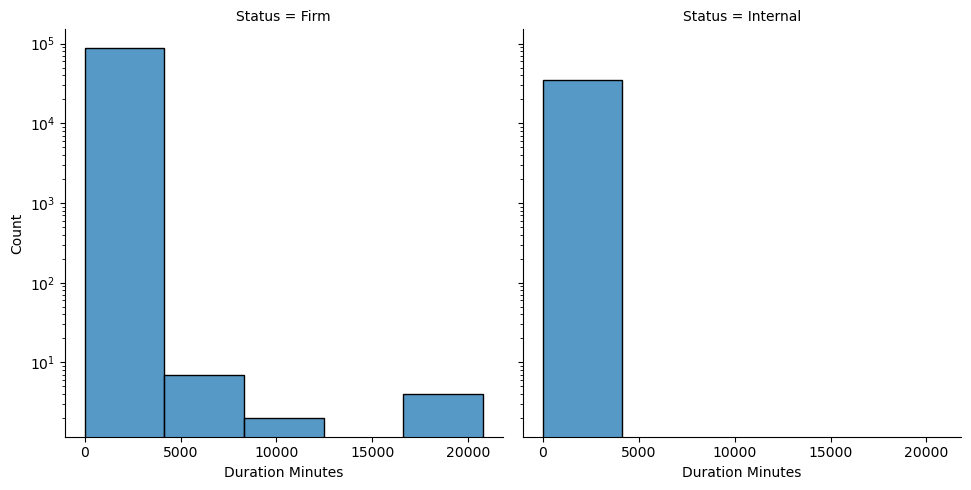

In [65]:
sns.displot(df, x="Duration Minutes", col="Status", bins=5)
plt.yscale('log')

In [69]:
df.groupby(['Year', 'Month'])['Headcount'].mean()


Year  Month
2013  1        35.967288
      2        36.064518
      3        34.744735
      4        36.778225
      5        38.006549
                 ...    
2022  8        17.481377
      9        17.726812
      10       17.143930
      11       17.492544
      12       17.448531
Name: Headcount, Length: 120, dtype: float64

In [77]:
#Lets separate the dataframes by 2013-2017 and 2018-2022

df1317= df[df['Year'] < 2018 && df[]]
df1822= df[df['Year'] > 2018]


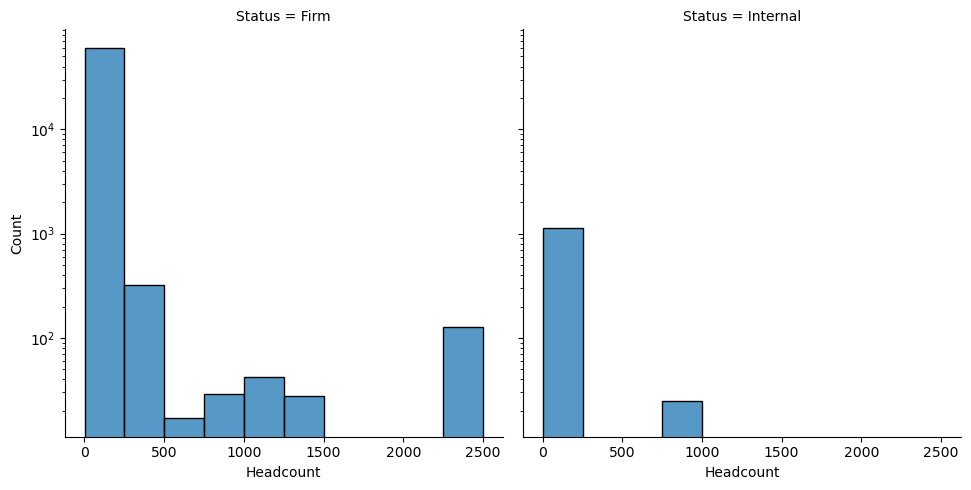

In [80]:
sns.displot(df1317, x="Headcount", col="Status", bins=10)
plt.yscale('log')

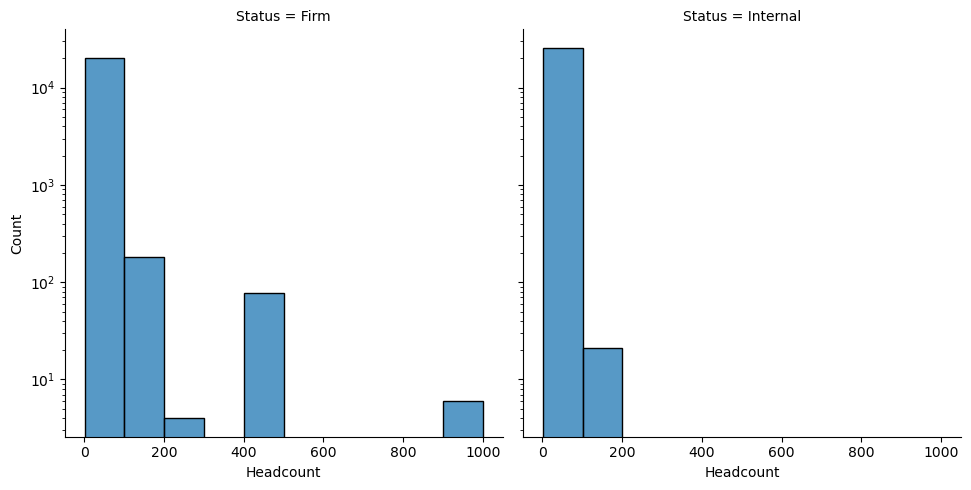

In [81]:
sns.displot(df1822, x="Headcount", col="Status", bins=10)
plt.yscale('log')

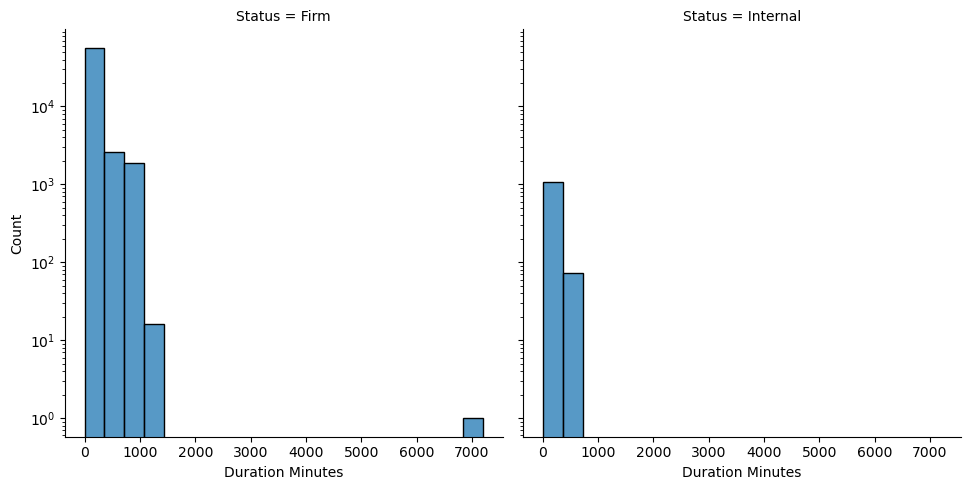

In [84]:
sns.displot(df1317, x="Duration Minutes", col="Status", bins=10)
plt.yscale('log')

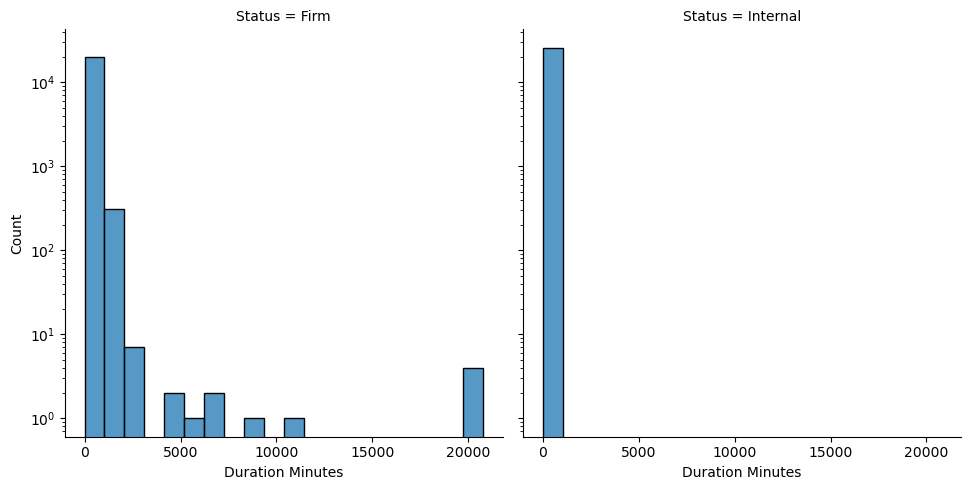

In [88]:
sns.displot(df1822, x="Duration Minutes", col="Status", bins=10)
plt.yscale('log')

In [ ]:
sns.displot(df1317, x="Duration Minutes", col="Status", bins=10)
plt.yscale('log')

In [89]:
df["Weekday"].corr(df["Duration Minutes"])

0.12720348967840997